In [33]:
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('mnist_train.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data = data[1:]
data = [a[1:] for a in data]

In [14]:
xs = np.array(data).reshape((60000, 28, 28, 1)).astype(int)/255
ys = xs

print(xs.shape)
print(ys.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 24, 24, 4)         292       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 22, 22, 2)         74        
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 20, 20, 1)         19        
_________________________________________________________________
flatten_27 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100)             

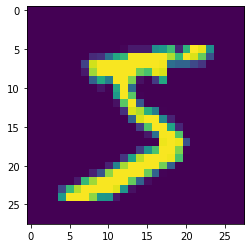

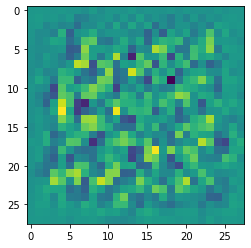

In [39]:
l = tf.keras.layers

model = tf.keras.models.Sequential([
    l.Conv2D(filters=8, kernel_size=3, padding='valid', input_shape=(28, 28, 1)),
    l.Conv2D(filters=4, kernel_size=3, padding='valid'),
    l.Conv2D(filters=2, kernel_size=3, padding='valid'),
    l.Conv2D(filters=1, kernel_size=3, padding='valid'),
    l.Flatten(),

    l.Dense(100, activation='relu'),
    l.Dropout(0.3),

    l.Dense(2, activation='sigmoid'),

    l.Dense(100, activation='relu'),
    l.Dropout(0.3),

    l.Dense(20*20*8, activation='relu'),
    l.Reshape((20, 20, 8)),

    l.Conv2DTranspose(filters=8, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=4, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=2, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=1, kernel_size=3, padding='valid')
])

model.summary()

plt.imshow(xs[0])
plt.show()

x = np.array([xs[0]])
plt.imshow(model.predict(x)[0])
plt.show()

# model.predict(np.array([xs[0]]))